In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

In [104]:
class Adaline(object):
    
    def __init__(self,eta=0.0001,iterations=20,random_state = 1,file_path = 'iris.data'):
        self.eta = eta
        self.file_path = file_path
        self.interations = iterations
        self.random_state = random_state
    
    def GetData(self):
        df = pd.read_csv(self.file_path,header=None)
        X = df.iloc[0:100,[0,2]].values
        y = df.iloc[0:100,4].values
        y = np.where(y == 'Iris-setosa',-1,1)
        self.X = X
#         Use features scale that gradient descent can converge more quickly
#         and the weights only works well for noramlized data
        self.X_std = np.array([(X[:,0]-np.mean(X[:,0]))/np.std(X[:,0]),(X[:,1]-np.mean(X[:,1]))/np.std(X[:,1])]).T
        self.y = y
        return self
        
    def InitializeWeight(self):
#         Container for the slow Mersenne Twister pseudo-random number generator
        rs = np.random.RandomState(self.random_state)
        self.WeightArray = rs.normal(loc = 0.0,scale = 0.01,size = 1 + self.X.shape[1] )
        return self
    
    def NetInputFunction(self,x):
#         To get the input value from X and weight
        return np.dot(x,self.WeightArray[1:]) + 1 * self.WeightArray[0]
    
    def ActivationFunction(self,x):
#         To activate the input value by activation funtion, as it is a linear function : phi = x, so return x.    
        return x
        
    def Learn(self):
        self.errorList = []
        for i in range(self.interations): 
#             Use GD to update the weightarray, it's different from Perceptron algorithm.
            acitived_X = self.ActivationFunction(self.NetInputFunction(self.X_std))
            error =  self.y - acitived_X 
            updat_0 = self.eta*np.sum(error)*1
            update_1 = self.eta*self.X.T.dot(error)
            self.WeightArray[0] += updat_0
            self.WeightArray[1:,] += update_1
            self.errorList.append(np.sum(error**2)/2)
        return self
    
    def Pridict(self,x):
#         np.where: Return elements chosen from x or y depending on condition.
        return np.where(self.ActivationFunction(self.NetInputFunction(x)) >= 0,1,-1)

In [105]:
def PlotErrorLine(errorList):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(range(1,len(errorList)+1),errorList,color='chocolate',marker = 'o')
    plt.xlabel('Interation')
    plt.ylabel('SSE')
    plt.title('SSE and Epochs')
    plt.show()
    
def PlotDesicionRegions(X,y,classifier,resolustion = 0.02):
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolustion),
                          np.arange(x2_min,x2_max,resolustion))
    xy = np.array([xx1.ravel(),xx2.ravel()]).T 
    pridcited_xy = classifier.Pridict(xy)
    z = pridcited_xy.reshape(xx1.shape)
    cmap = ListedColormap(['red','green'])
    plt.figure(figsize=(8,6),dpi=80)
    plt.contourf(xx1,xx2,z,alpha = 0.6,cmap = cmap)
    plt.scatter(X[0:50,0],X[0:50,1],c='red',marker='v',label='Iris-setosa')
    plt.scatter(X[50:100,0],X[50:100,1],c='blue',marker='^',label='Iris-versicolor')
    plt.xlabel("sepal length (standardized) ")
    plt.ylabel("petal length (standardized) ")
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


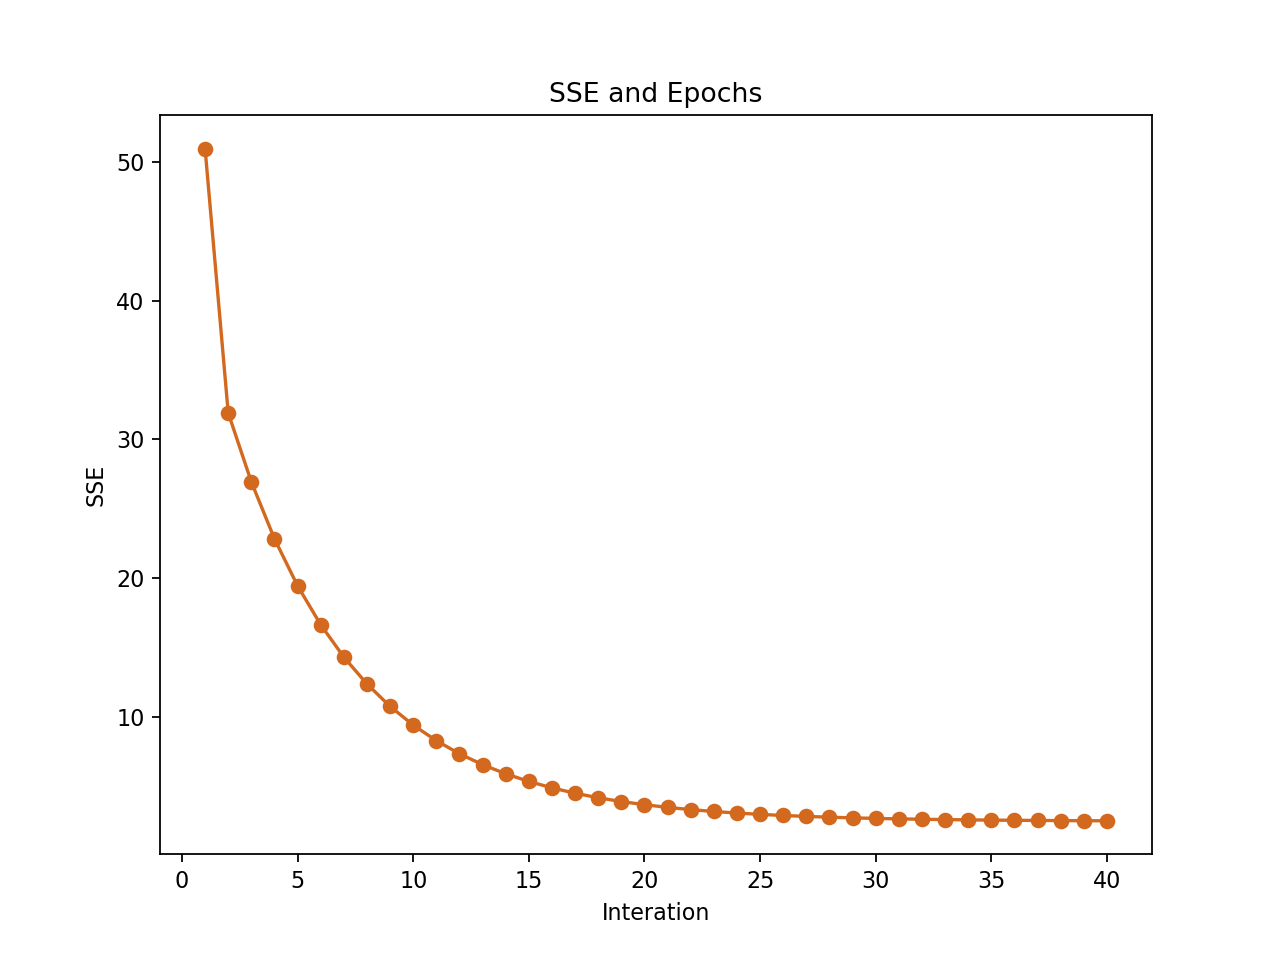

<IPython.core.display.Javascript object>


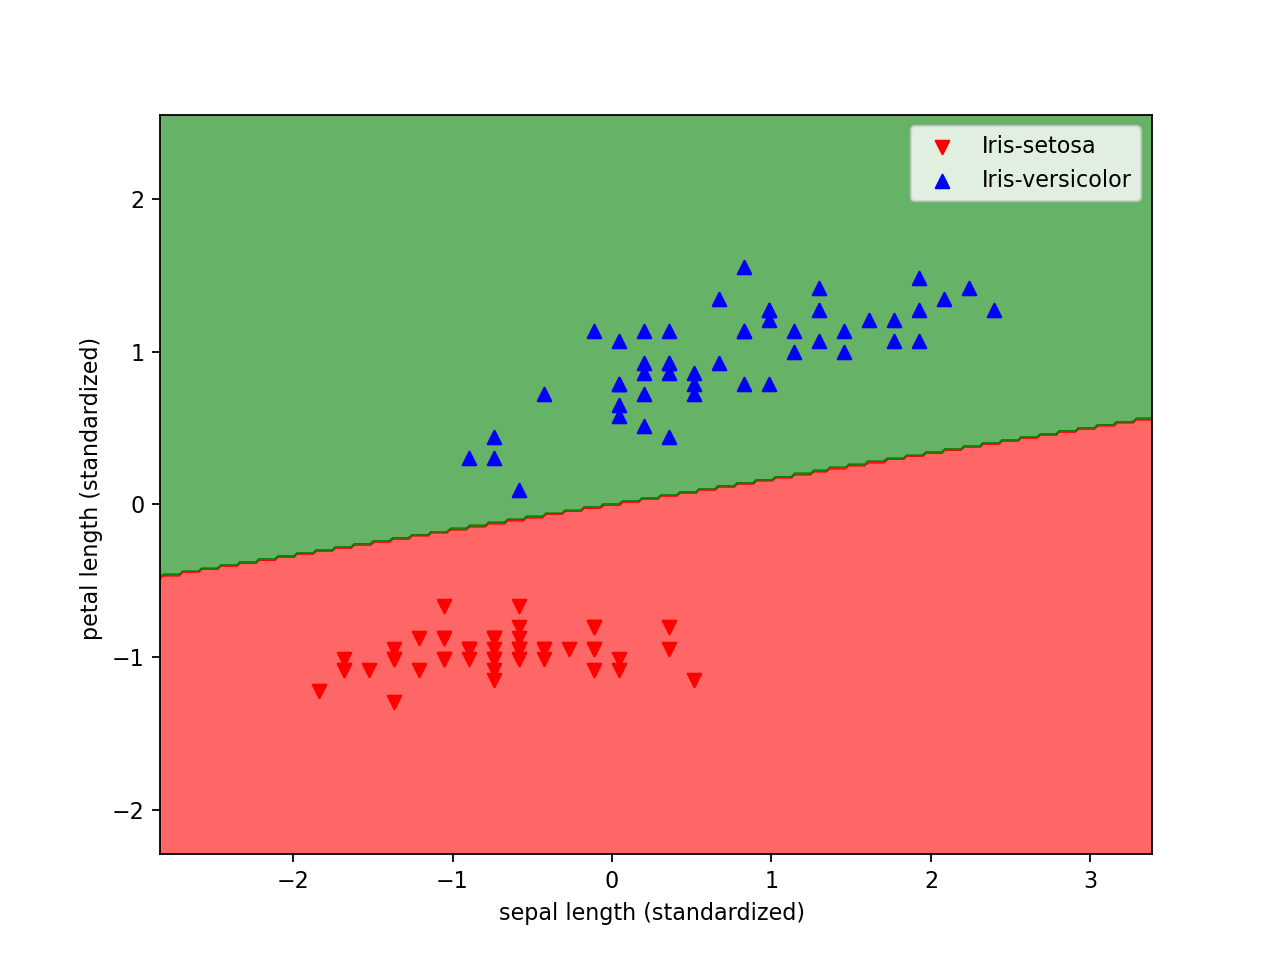

In [106]:
if __name__ == '__main__':
    #First initialize an object
    Adaline = Adaline(eta=0.01,iterations=40)
    #Then read the data
    Adaline.GetData()
    #Initialize weightArray using normal dittribution
    Adaline.InitializeWeight()
    #Train and learn!!!
    Adaline.Learn()
    PlotErrorLine(Adaline.errorList)
    PlotDesicionRegions(Adaline.X_std,Adaline.y,Adaline) 